In [1]:
#Import basic necessary datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #To print multiple outputs
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#Read the datasets and view the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
train.shape
train.head()
test.shape
test.head()

(43400, 12)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


(18601, 11)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
train.isnull().sum()
test.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [3]:
train.bmi.fillna(value=0, axis=0, inplace=True)
test.bmi.fillna(value=0, axis=0, inplace=True)

In [4]:
train.smoking_status.fillna(value='no information', axis=0, inplace=True)
test.smoking_status.fillna(value='no information', axis=0, inplace=True)

In [12]:
import seaborn as sns
sns.pairplot(train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


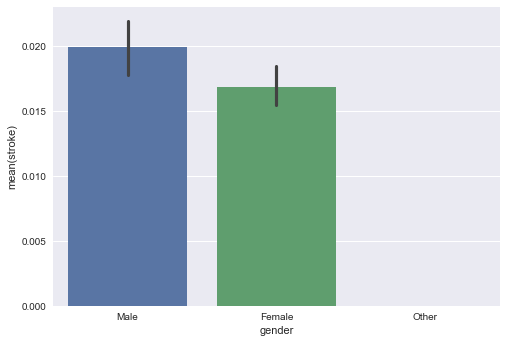

In [19]:
sns.barplot(x='gender',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


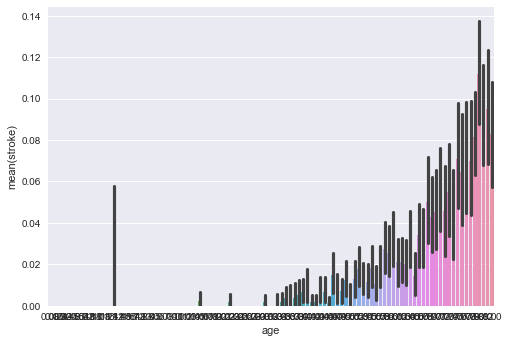

In [114]:
sns.barplot(x='age',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


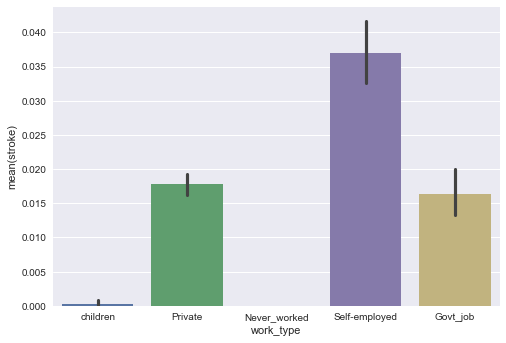

In [115]:
sns.barplot(x='work_type',y='stroke',data=train)

In [242]:
train.work_type[train.work_type == 'children'] = 'Never_worked'
test.work_type[test.work_type == 'children'] = 'Never_worked'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


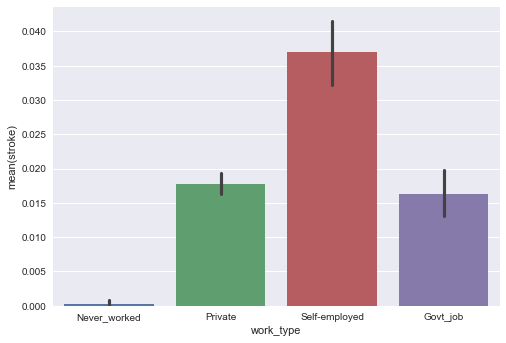

In [163]:
sns.barplot(x='work_type',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


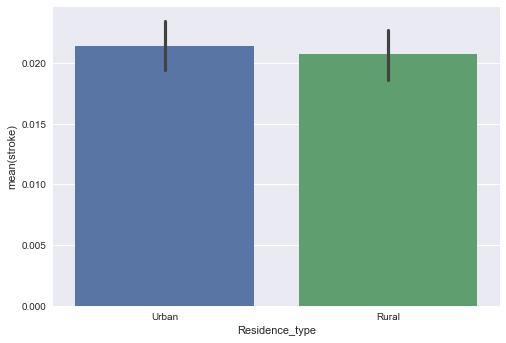

In [118]:
sns.barplot(x='Residence_type',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


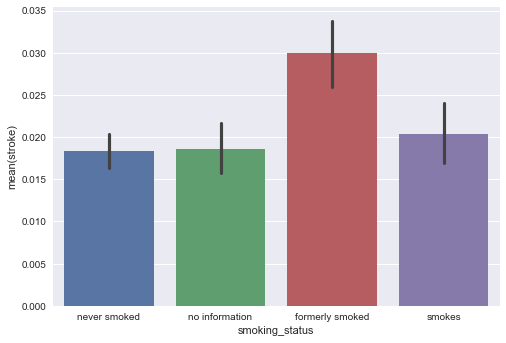

In [119]:
sns.barplot(x='smoking_status',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


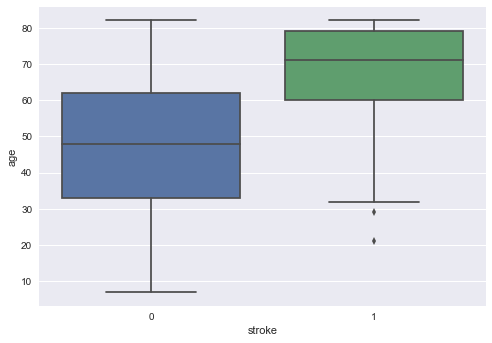

In [120]:
sns.boxplot(x='stroke', y='age', data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


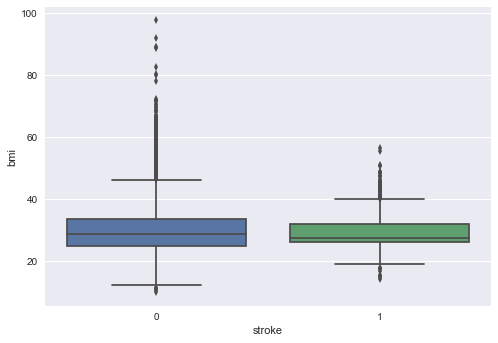

In [121]:
sns.boxplot(x='stroke', y='bmi', data=train)

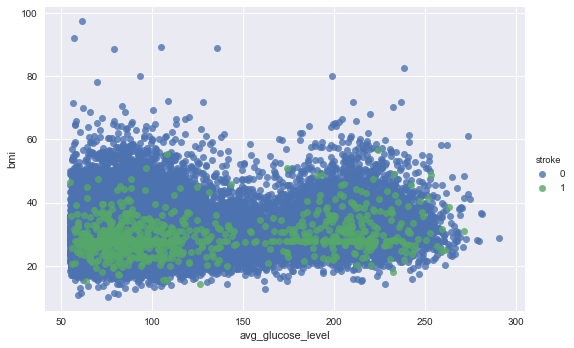

In [122]:
sns.lmplot(x='avg_glucose_level', y='bmi', hue = 'stroke', data=train, aspect=1.5, ci = None, fit_reg = False)
plt.show()

In [214]:
train.age.min()
train.age.max()

0.080000000000000002

82.0

In [5]:
train.age = np.digitize(train.age, bins=np.arange(start=train.age.min(),stop=train.age.max(),step=10))
test.age = np.digitize(test.age, bins=np.arange(start=test.age.min(),stop=test.age.max(),step=10))

In [202]:
train.age.value_counts()
test.age.value_counts()

6    6691
5    6441
4    5521
7    5229
3    5221
1    4598
2    4417
8    4393
9     889
Name: age, dtype: int64

6    2826
5    2702
4    2399
3    2273
7    2225
1    2009
2    1913
8    1896
9     358
Name: age, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


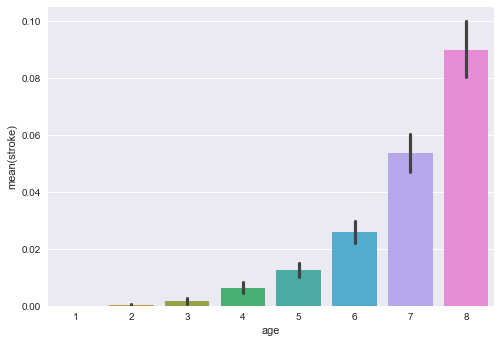

In [126]:
sns.barplot(x='age', y='stroke', data=train)

In [244]:
train.age[train.age.isin([1,2,3])] = 4
test.age[test.age.isin([1,2,3])] = 4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


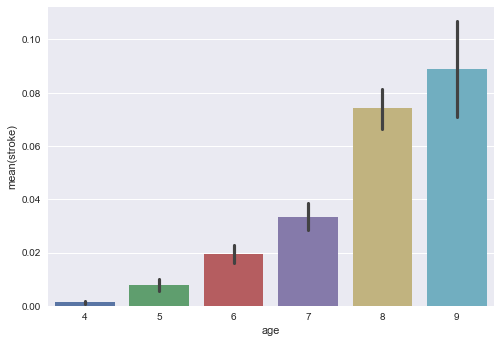

In [245]:
sns.barplot(x='age', y='stroke', data=train)

In [129]:
train.avg_glucose_level.min()
train.avg_glucose_level.max()

55.009999999999998

291.05000000000001

In [6]:
train.avg_glucose_level = np.digitize(train.avg_glucose_level, bins=np.arange(start=train.avg_glucose_level.min(),stop=train.avg_glucose_level.max(),step=50))
test.avg_glucose_level = np.digitize(test.avg_glucose_level, bins=np.arange(start=test.avg_glucose_level.min(),stop=test.avg_glucose_level.max(),step=50))

In [131]:
train.avg_glucose_level.value_counts()
test.avg_glucose_level.value_counts()

1    24943
2     6909
4     2650
3     2459
5       97
Name: avg_glucose_level, dtype: int64

1    12726
2     3649
4     1107
3     1082
5       37
Name: avg_glucose_level, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


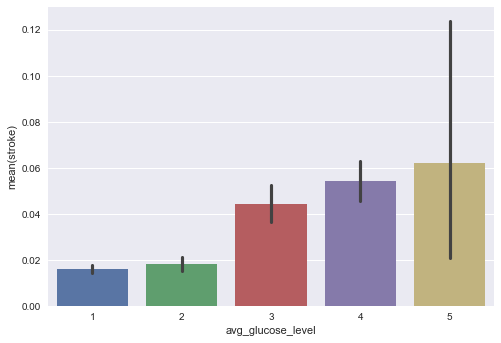

In [132]:
sns.barplot(x='avg_glucose_level', y='stroke', data=train)

In [133]:
train.bmi.min()
train.bmi.max()

10.1

97.599999999999994

In [7]:
train.bmi = np.digitize(train.bmi, bins=np.arange(start=train.bmi.min(),stop=train.bmi.max(),step=10))
test.bmi = np.digitize(test.bmi, bins=np.arange(start=test.bmi.min(),stop=test.bmi.max(),step=10))

In [8]:
train.bmi.value_counts()
test.bmi.value_counts()

3     20993
4     12696
2      4930
5      2732
1      1462
6       497
7        73
8         8
9         6
10        3
Name: bmi, dtype: int64

3    9011
4    5457
2    2147
5    1129
1     591
6     226
7      35
8       4
9       1
Name: bmi, dtype: int64

In [8]:
train.bmi[train.bmi.isin([7,8,9,10])] = 6
test.bmi[test.bmi.isin([7,8,9,10])] = 6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
train.bmi.value_counts()
test.bmi.value_counts()

3    20993
4    12696
2     4930
5     2732
1     1462
6      587
Name: bmi, dtype: int64

3    9011
4    5457
2    2147
5    1129
1     591
6     266
Name: bmi, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


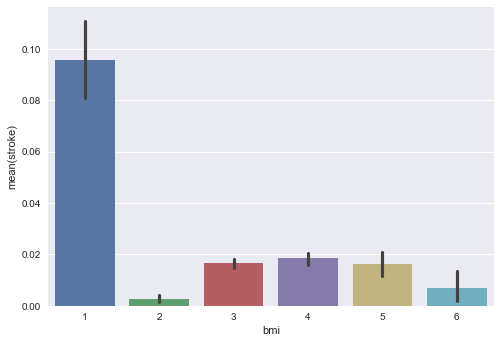

In [13]:
sns.barplot(x='bmi', y='stroke', data=train)

In [5]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [7]:
train = pd.get_dummies(train, columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)
test = pd.get_dummies(test, columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)

In [8]:
train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,0,0,1,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,1,0,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,0,0,1,0,1,0,0,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,0,0,1,0


In [9]:
test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,80.0,0,0,83.84,21.1,1,0,1,0,1,0,0,1,0,0,0
1,74.0,0,1,179.50,26.0,0,0,1,0,0,1,0,0,0,0,0
2,14.0,0,0,95.16,21.2,0,0,0,0,0,0,1,0,0,1,0
3,28.0,0,0,94.76,23.4,1,0,0,0,1,0,0,1,0,1,0
4,63.0,0,0,83.57,27.6,0,0,1,0,0,0,0,0,1,0,0


In [10]:
train.columns
test.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_never smoked', 'smoking_status_no information',
       'smoking_status_smokes'],
      dtype='object')

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_never smoked', 'smoking_status_no information',
       'smoking_status_smokes'],
      dtype='object')

In [11]:
feature_cols = train.columns.drop(['stroke'])
feature_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_never smoked', 'smoking_status_no information',
       'smoking_status_smokes'],
      dtype='object')

In [12]:
# Separate input features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = train[feature_cols]
y = train.stroke

In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_scaled = std.fit_transform(X)
X_scaled

array([[-1.74151677, -0.32129564, -0.22334159, ..., -0.76616667,
         1.50503218, -0.42205601],
       [ 0.700823  ,  3.11239826, -0.22334159, ...,  1.30519903,
        -0.66443762, -0.42205601],
       [-1.51948588, -0.32129564, -0.22334159, ..., -0.76616667,
         1.50503218, -0.42205601],
       ..., 
       [ 1.76657127,  3.11239826, -0.22334159, ..., -0.76616667,
        -0.66443762, -0.42205601],
       [-0.0984882 , -0.32129564, -0.22334159, ...,  1.30519903,
        -0.66443762, -0.42205601],
       [ 1.76657127, -0.32129564, -0.22334159, ...,  1.30519903,
        -0.66443762, -0.42205601]])

In [16]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=123)

In [17]:
#First, let's import the Logistic Regression algorithm and the accuracy metric from Scikit-Learn.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#cross validation
logreg = LogisticRegression(random_state=123).fit(X_train,y_train)
logreg_score = cross_val_score(logreg, X_train, y_train, cv=10, scoring='roc_auc')
logreg_score.mean() #training accuracy

# Predict on training set
y_pred = logreg.predict_proba(X_test)
 
# How's our accuracy?
metrics.roc_auc_score(y_test, y_pred[:,1]) # testing accuracy

0.85276668392989163

0.87628293292161996

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

bagc = BaggingClassifier(LogisticRegression(), 
                         n_estimators=100,
                         bootstrap=False,
                         random_state=123).fit(X_train,y_train)
bagc_score = cross_val_score(bagc, X_train, y_train, cv=10, scoring='roc_auc')
bagc_score.mean() #training accuracy

# Predict on training set
y_pred = bagc.predict_proba(X_test)
 
# How's our accuracy?
metrics.roc_auc_score(y_test, y_pred[:,1]) # testing accuracy

0.85006350942852449

0.87669166127122899

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = np.array([100, 125, 150])
samples = [0.8,0.9,1.0]
features = [0.8,0.9,1.0]
state = np.array(list(range(10)))
params = {'n_estimators':estimator, 'max_samples':samples, 'max_features': features, 'random_state':state}
grid = GridSearchCV(bagc, params, cv=10, scoring='roc_auc')
grid.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best{}'.format(grid.best_score_, grid.best_params_))

In [31]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
                                n_estimators=100,
                                ratio='auto',
                                replacement=False,
                                random_state=0).fit(X_train, y_train)

#cross-validation
bbc_score = cross_val_score(bbc, X_train, y_train, cv=10, scoring='roc_auc')
bbc_score.mean()

#predict on test data
y_pred = bbc.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred[:,1])

0.84972941435255256

0.87276719867597863

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(base_estimator=LogisticRegression()).fit(X_train, y_train)

estimator = np.array([50, 100, 150])
samples = [0.8,0.9,1.0]
features = [0.8,0.9,1.0]
state = np.array(list(range(10)))
params = {'n_estimators':estimator, 'max_samples':samples, 'max_features': features, 'random_state':state}
grid = GridSearchCV(bbc, params, cv=10, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best{}'.format(grid.best_score_, grid.best_params_))

In [27]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(LogisticRegression(), random_state=123).fit(X_train,y_train)
abc_score = cross_val_score(abc, X_train, y_train, cv=10, scoring='roc_auc')
abc_score.mean() #training accuracy

# Predict on training set
y_pred = abc.predict_proba(X_test)
 
# How's our accuracy?
metrics.roc_auc_score(y_test, y_pred[:,1]) # testing accuracy

0.83491997408873231

0.8442960486240676

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = GaussianNB()

vc1 = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2)], voting='hard')
vc1_score = cross_val_score(vc1, X_train, y_train, cv=10, scoring='accuracy')
vc1_score.mean()
vc1 = vc1.fit(X_train, y_train)
y_pred = vc1.predict(X_test)
metrics.roc_auc_score(y_test,y_pred)

vc2 = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2)], voting='soft')
vc2_score = cross_val_score(vc2, X_train, y_train, cv=10, scoring='roc_auc')
vc2_score.mean()
vc2 = vc2.fit(X_train, y_train)
y_pred = vc2.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_pred[:,1])

vc3 = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2)], voting='soft', weights=[2,1], flatten_transform=True)
vc3_score = cross_val_score(vc3, X_train, y_train, cv=10, scoring='roc_auc')
vc3_score.mean()
vc3 = vc3.fit(X_train, y_train)
y_pred = vc3.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_pred[:,1])

0.98196623313457176

0.5

0.84713901324203333

0.86001161775016

0.84712280294952547

0.86130269171682183

In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

ind_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
xgb = XGBClassifier(**ind_params).fit(X_train,y_train)                             
xgb_score = cross_val_score(xgb, X_train, y_train, cv=10, scoring='roc_auc')
xgb_score.mean() #training accuracy

# Predict on training set
y_pred = xgb.predict_proba(X_test)
 
# How's our accuracy?
metrics.roc_auc_score(y_test, y_pred[:,1]) # testing accuracy 

0.84195138488444488

0.85747161169705355

In [33]:
import xgboost
xgdmat = xgboost.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient
%time cv_xgb = xgboost.cv(params = ind_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5, metrics = ['error'], early_stopping_rounds = 100) 
# Look for early stopping that minimizes error, # Make sure you enter metrics inside a list or you may encounter issues!

Wall time: 8.51 s


In [34]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.018126,0.001716,0.018011,0.000412
1,0.018034,0.001710,0.018034,0.000427


In [35]:
final_gb = xgboost.train(ind_params, xgdmat, num_boost_round = 2)

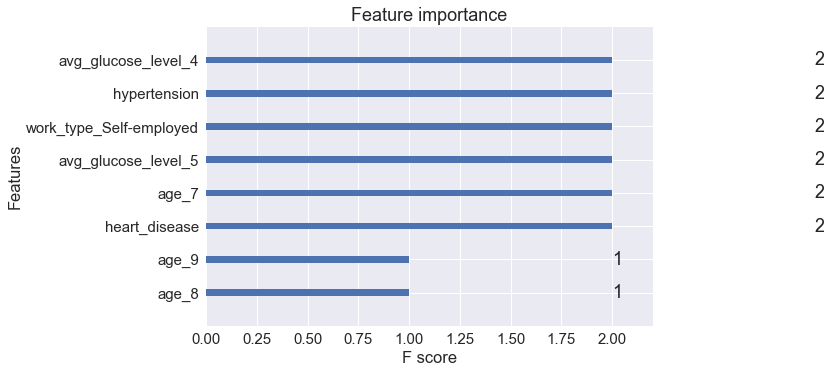

In [36]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)
xgboost.plot_importance(final_gb)

In [39]:
testdmat = xgboost.DMatrix(X_test)
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred
metrics.roc_auc_score(y_test,y_pred)

array([ 0.40699285,  0.40699285,  0.41386181, ...,  0.40699285,
        0.40699285,  0.40699285], dtype=float32)

0.80792616934139905

In [18]:
test_pred = logreg.predict_proba(test[feature_cols])
sample['stroke'] = test_pred[:,1]
sample.head()
sample.to_csv('sample_submission.csv',index=False)

,id,stroke
0,36306,1.0
1,61829,1.0
2,14152,1.0
3,12997,1.0
4,40801,1.0
